In [1]:
import numpy as np
import gvar as gv
import sys
sys.path.append('../')
from h5glance import H5Glance 
import os
import lsqfit
import io
import yaml
import matplotlib
import matplotlib.pyplot as plt
import warnings  
warnings.simplefilter(action="default")
warnings.filterwarnings('ignore') 

In [2]:
os.chdir('../../nucleon_sigma/xpt')

In [3]:
import fit_analysis as fa 
import fit_routine as fit
import i_o
import priors
import fpi_fit

In [4]:
from priors import prior
prior = prior
#print(prior)

In [5]:
#gv.load('../data/scale_setting.p')

In [6]:
#FIND BETTER WAY TO LOAD IN MODEL VIA CLI PROMPT#

f = open('models.yaml', 'r')
models = yaml.load(f,Loader=yaml.FullLoader)
    #print(keys)
model_info = {}
for item in models.values():
        #smodel_info = item['m_p:s_lo:d_lo:x_lo:l_lo:fpi']
        #model_info = item['eps_p:s_n4lo:d_n4lo:x_n4lo:l_n4lo:fpi']
        #model_info = item['eps_p:taylor:l_lo']
        model_info = item['eps_p:taylor:l_n4lo:d_lo']
        #model_info = item['eps_p:taylor:l_n2lo']
        #model_info = item['eps_p:taylor:l_n2lo:x_lo']
        #model_info = item['eps_p:l_n2lo:xpt_lo']
        #model_info = item['eps_p:taylor:l_lo:x_lo']

        model_info_sigma = item['eps_p:taylor:l_n4lo:d_lo:sigma_pi']
        model_info_fpi = item['fpi:l_n2lo:d_n2lo:x_n2lo']
#print(model_info)

In [7]:
input_output = i_o.InputOutput()
data,ensembles = input_output.get_data(scheme='w0_org',units='phys',include_phys=False)
new_prior = input_output.make_prior(data,prior)
phys_point_data = input_output.get_data_phys_point()

In [8]:
ensembles

['a06m310L',
 'a09m135',
 'a09m220',
 'a09m310',
 'a09m350',
 'a09m400',
 'a12m130',
 'a12m220L',
 'a12m310',
 'a12m350',
 'a12m400',
 'a15m135XL',
 'a15m220',
 'a15m310L',
 'a15m350',
 'a15m400']

In [9]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
#extrap_mass = fit_analysis._extrapolate_to_ens(phys_params=None)
extrap_mass = fit_analysis.fitfcn(particle='proton')
extrap_mass_phys = extrap_mass * phys_point_data['lam_chi']
#test = fit_analysis.fitfcn(particle='sigma_pi')
print(extrap_mass, extrap_mass_phys)

0.8226(53) 951.7(8.5)


In [10]:
# from importlib import reload
# reload(fa)
# fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
# test = fit_analysis.fitfcn(particle='proton')

In [11]:
fit_fpi = fpi_fit.fit_routine(prior=new_prior, data=data, model_info=model_info_fpi)
fit_fpi_out = fit_fpi.fit
print(fit_fpi_out)
#print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_fpi_out)

Least Square Fit:
  chi2/dof [dof] = 27 [16]    Q = 3e-80    logGBF = -199.35

Parameters:
             F0      3.793 (65)      [       90 (50) ]  *
         l4_bar       1.0 (5.0)      [     4.7 (5.0) ]  
           c_2F         15 (47)      [       0 (100) ]  
     d_{fpi,ll}       1.0 (3.5)      [     0.0 (4.0) ]  
      d_{fpi,a}      21.88 (41)      [     0.0 (4.0) ]  *****
     d_{fpi,aa}     -37.08 (87)      [     0.0 (4.0) ]  *****
     d_{fpi,al}       0.59 (94)      [     0.0 (4.0) ]  
           c_1F    -2.9590 (43)      [       0 (100) ]  
       eps_pi 0    0.24636 (70)      [  0.24845 (71) ]  **
              1    0.11622 (33)      [  0.11619 (33) ]  
              2    0.18219 (37)      [  0.18197 (37) ]  
              3    0.24673 (44)      [  0.24619 (44) ]  *
              4    0.27002 (57)      [  0.26949 (58) ]  
              5    0.29868 (53)      [  0.29819 (54) ]  
              6    0.11354 (33)      [  0.11360 (33) ]  
              7    0.18144 (42)      [  

In [12]:
fit_mp = fit.fit_routine(prior=new_prior, data=data, model_info=model_info)
fit_mp_out = fit_mp.fit
print('extrapolation:','\n','M_0/lam_chi:',extrap_mass, '\n','M_0(meV):',extrap_mass_phys,'\n',fit_mp_out)

extrapolation: 
 M_0/lam_chi: 0.8226(53) 
 M_0(meV): 951.7(8.5) 
 Least Square Fit:
  chi2/dof [dof] = 1.1 [16]    Q = 0.34    logGBF = 40.501

Parameters:
   m_{proton,0}      0.822 (12)      [     0.90 (40) ]  
   b_{proton,2}       1.58 (70)      [     2.0 (2.0) ]  
         l4_bar      -1.15 (38)      [     4.7 (5.0) ]  *
   b_{proton,4}      -0.1 (1.9)      [     0.0 (2.0) ]  
   b_{proton,6}    -0.04 (2.00)      [     0.0 (2.0) ]  
   d_{proton,a}     -0.034 (23)      [     0.0 (5.0) ]  
       eps_pi 0    0.24873 (68)      [  0.24845 (71) ]  
              1    0.11610 (33)      [  0.11619 (33) ]  
              2    0.18199 (37)      [  0.18197 (37) ]  
              3    0.24613 (44)      [  0.24619 (44) ]  
              4    0.26936 (57)      [  0.26949 (58) ]  
              5    0.29823 (52)      [  0.29819 (54) ]  
              6    0.11363 (33)      [  0.11360 (33) ]  
              7    0.18161 (40)      [  0.18155 (42) ]  
              8    0.24486 (49)      [  0.244

In [13]:
fit_fpi = fit.fit_routine(prior=new_prior, data=data, model_info=model_info_fpi)
fit_fpi_out = fit_fpi.fit
print(fit_fpi_out)

KeyError: 'eps_Fpi'

In [ ]:
fit_mp.extrapolate

In [ ]:
fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
extrap_mass_deriv = fit_analysis_sigma._extrapolate_to_ens(phys_params='proton')
extrap_mass_deriv = fit_analysis.fitfcn(p=fit_sigma_out.y, data=phys_point_data)
m_proton_deriv =  extrap_mass_deriv['proton'][8]
print(m_proton_deriv)

KeyError: 'eps_sigma_pi_n'

In [ ]:
reload(io)
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = fit_mp_out.p['m_{proton,0}']
e_pi = m_pi / lam_chi
sigma = m_pi**2 *gv.deriv(m_proton, m_pi**2)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton_deriv
term_1 = lam_chi * e_pi/2 * m_proton_deriv * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'm_proton_deriv' is not defined

In [ ]:
from importlib import reload
reload(fa)
fit_analysis = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info, prior=prior)
#extrap_mass = fit_analysis._extrapolate_to_ens(phys_params=None)
extrap_mass = fit_analysis.fitfcn()
print(extrap_mass)

{'m_{proton,0}': 0.8093(63), 'b_{proton,4}': 1.2(1.5), 'b_{proton,6}': 0.2(2.0), 'b_{proton,2}': 0.74(18), 'd_{proton,a}': -0.034(23), 'eps2_a': 0(0), 'a': 0(0), 'alpha_s': 0(0), 'L': inf(0), 'hbarc': 197.327(0), 'lam_chi': 1157.0(7.2), 'm_pi': 134.80(30), 'm_k': 494.20(30), 'eps_pi': 0.11651(77), 'eps_k': 0.4271(27), 'm_proton': 938.9187470(42), 'eps_proton': 0.8115(50), 'm_delta': 1232.0(2.0), 'eps_delta': 1.0648(68)}
{'proton': 0.8195(47)}


In [ ]:
# fit_analysis_sigma = fa.fit_analysis(phys_point_data=phys_point_data, data=data,model_info=model_info_sigma, prior=prior)
# extrap_mass_deriv = fit_analysis_sigma._extrapolate_to_ens(phys_params='proton')
# extrap_mass_deriv = fit_analysis.fitfcn(p=fit_sigma_out.y, data=phys_point_data)
# m_proton_deriv =  extrap_mass_deriv['proton'][8]
# print(m_proton_deriv)

In [ ]:
def plot_parameters(xparam=None, yparam='mp'):
        if yparam is None:
            yparam = 'eps_proton'

        x = {}
        y = {}
        c = {}
        fit = {}

        #plt.axes([0.145,0.145,0.85,0.85])
            
        colors = {
            '06' : '#6A5ACD',
            '09' : '#51a7f9',
            '12' : '#70bf41',
            '15' : '#ec5d57',
        }

        for i in  range(len(ensembles)):
            for j, param in enumerate([xparam, yparam]):
                if param == 'mp':
                    value = fit_mp_out.y['proton'][i]
                    label = '$\epsilon_p$'

                elif param == 'eps_pi':
                    value = fit_mp_out.p['eps_pi'][i]
                    label = '$\epsilon_\pi$'

                elif param == 'eps2_a':
                    value = fit_mp_out.p['eps2_a'][i]
                    label = '$\epsilon_a^2$'


                if j == 0:
                    x[i] = value
                    xlabel = label
                elif j == 1:
                    y[i] = value
                    ylabel = label

        for i in range(len(ensembles)):
            C = gv.evalcov([x[i], y[i]])
            eVe, eVa = np.linalg.eig(C)
            for e, v in zip(eVe, eVa.T):
                plt.plot([gv.mean(x[i])-1*np.sqrt(e)*v[0], 1*np.sqrt(e)*v[0] + gv.mean(x[i])],
                        [gv.mean(y[i])-1*np.sqrt(e)*v[1], 1*np.sqrt(e)*v[1] + gv.mean(y[i])],
                         alpha=1.0, lw=2)
                plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
                          marker='o', mec='w', zorder=3)


        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),
            ncol=len(by_label), bbox_to_anchor=(0,1), loc='lower left')
        plt.grid()
        plt.xlabel(xlabel, fontsize = 24)
        plt.ylabel(ylabel, fontsize = 24)
        plt.axvline(gv.mean(phys_point_data['eps_pi']), ls='--', label='phys. point')

        fig = plt.gcf()
        plt.close()
        return fig

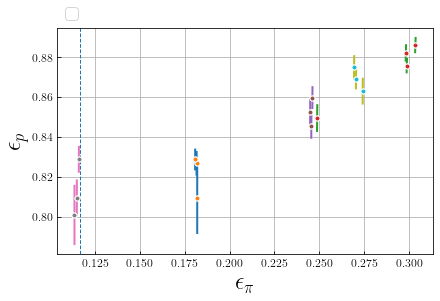

In [ ]:
plot_parameters(xparam='eps_pi', yparam='mp')

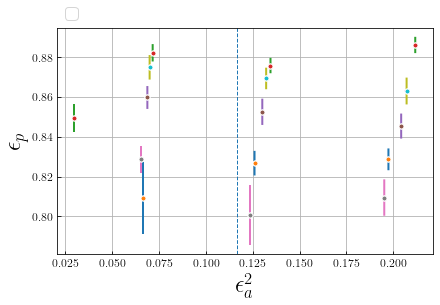

In [ ]:
plot_parameters(xparam='eps2_a', yparam='mp')

In [ ]:
y_fit = fit_analysis.fitfcn(particle='proton')
np.repeat(y_fit,16)

{'m_{proton,0}': 0.8093(63), 'b_{proton,4}': 1.2(1.5), 'b_{proton,6}': 0.2(2.0), 'b_{proton,2}': 0.74(18), 'd_{proton,a}': -0.034(23), 'eps2_a': 0(0), 'a': 0(0), 'alpha_s': 0(0), 'L': inf(0), 'hbarc': 197.327(0), 'lam_chi': 1157.0(7.2), 'm_pi': 134.80(30), 'm_k': 494.20(30), 'eps_pi': 0.11651(77), 'eps_k': 0.4271(27), 'm_proton': 938.9187470(42), 'eps_proton': 0.8115(50), 'm_delta': 1232.0(2.0), 'eps_delta': 1.0648(68)}


array([0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47), 0.8195(47),
       0.8195(47)], dtype=object)

In [ ]:
def plot_fit(xparam=None, yparam='mp'):
        if yparam is None:
            yparam = 'eps_proton'

        x = {}
        y = {}
        c = {}
        #fit = {}

        #plt.axes([0.145,0.145,0.85,0.85])
            
        colors = {
            '06' : '#6A5ACD',
            '09' : '#51a7f9',
            '12' : '#70bf41',
            '15' : '#ec5d57',
        }

        for i in  range(len(ensembles)):
            for j, param in enumerate([xparam, yparam]):
                if param == 'mp':
                    value = fit_mp_out.y['proton'][i]
                    label = '$\epsilon_p$'

                elif param == 'eps_pi':
                    value = fit_mp_out.p['eps_pi'][i]
                    label = '$\epsilon_\pi$'
                    #min,max linspace

                elif param == 'eps2_a':
                    value = fit_mp_out.p['eps2_a'][i]
                    label = '$\epsilon_a^2$'


                if j == 0:
                    x[i] = value
                    xlabel = label
                elif j == 1:
                    y[i] = value
                    ylabel = label

        y_fit = fit_analysis.fitfcn(particle='proton')
        y_fit = np.repeat(y_fit,15)
        print(y_fit,value)

        pm = lambda g, k : gv.mean(g) + k *gv.sdev(g)
        #if xx != '00':

        plt.fill_between(pm(value, 0), pm(y_fit, -1), pm(y_fit, +1), alpha=0.4)
        plt.show()
        return None

        for i in range(len(ensembles)):
            C = gv.evalcov([x[i], y[i]])
            eVe, eVa = np.linalg.eig(C)
            for e, v in zip(eVe, eVa.T):
                plt.plot([gv.mean(x[i])-1*np.sqrt(e)*v[0], 1*np.sqrt(e)*v[0] + gv.mean(x[i])],
                        [gv.mean(y[i])-1*np.sqrt(e)*v[1], 1*np.sqrt(e)*v[1] + gv.mean(y[i])],
                         alpha=1.0, lw=2)
                plt.plot(gv.mean(x[i]), gv.mean(y[i]), 
                          marker='o', mec='w', zorder=3)


        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(),
            ncol=len(by_label), bbox_to_anchor=(0,1), loc='lower left')
        plt.grid()
        plt.xlabel(xlabel, fontsize = 24)
        plt.ylabel(ylabel, fontsize = 24)
        plt.axvline(gv.mean(phys_point_data['eps_pi']), ls='--', label='phys. point')

        fig = plt.gcf()
        plt.close()
        return fig

[0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50)
 0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50) 0.8191(50)
 0.8191(50) 0.8191(50) 0.8191(50)] 0.8860(36)


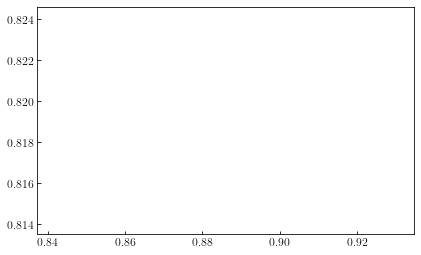

In [ ]:
plot_fit(xparam='eps_pi', yparam='mp')

In [ ]:
reload(io)
m_pi = phys_point_data['m_pi']
lam_chi = phys_point_data['lam_chi']
m_proton = fit_mp_out.p['m_{proton,0}']
e_pi = m_pi / lam_chi
sigma = m_pi**2 *gv.deriv(m_proton, m_pi**2)
l3 = gv.gvar('3.53(26)')
l4 = gv.gvar('4.73(10)')
term_0 = lam_chi * e_pi/2 * m_proton_deriv
term_1 = lam_chi * e_pi/2 * m_proton_deriv * e_pi**2*(5/2 - l3/2 - 2*l4 )
term_2 = e_pi**2 * m_proton*(l4-1)
sigma = term_0 + term_1 + term_2
print(term_0,term_1,term_2,sigma)
sigma_analytic = (e_pi/2 * (1 + e_pi**2*(5/2 - l3/2 - 2*l4 )) *m_proton_deriv) * lam_chi
print('sigma w/ gv.deriv:',sigma)
print('sigma analytic:',sigma_analytic)


NameError: name 'm_proton_deriv' is not defined